In [2]:
from py_core import Board, Evidence, iterator
from random import choice, sample
import matplotlib.pyplot as plt
import matplotlib.patches as patches

e = Evidence(counter_move=True)

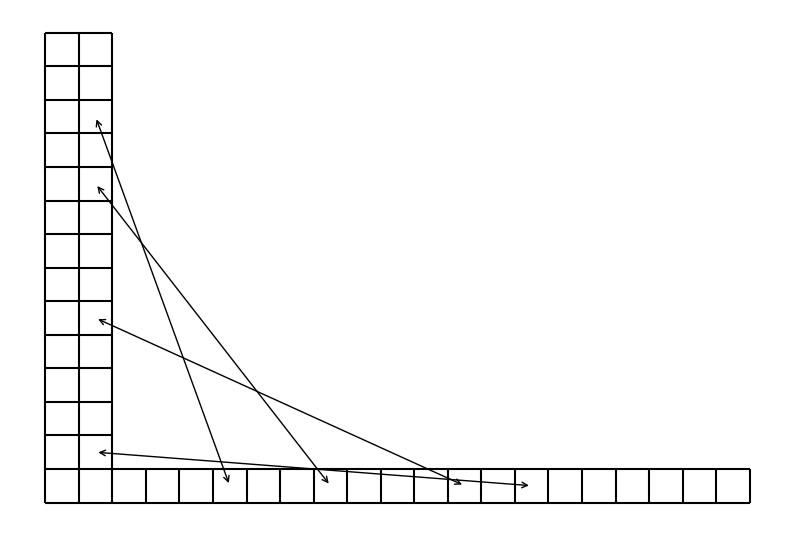

In [25]:
def draw_board(*board):
    board = Board(board)
    def draw(func, data):
        x = [i for i in range(len(data) + 1)]
        y = (data[0],) + data
        func(x, 0, y, colors='k')
    
    draw(plt.hlines, board.data)
    draw(plt.vlines, board.clone()._flip().data)

def draw_arrow(*board):
    board = Board(board)
    result = e.get(board)
    pairs = dict()
    if not result:
        for move in iterator(board):
            if move in pairs: continue
            new = board.chomp(*move)
            res = e.get(new)
            if len(res) == 1:
                pairs[move] = res[0]
                pairs[res[0]] = move
            else:
                for option in res:
                    if option in pairs:
                        pairs[move] = option
                        if isinstance(pairs[option], list):
                            pairs[option] = move
                        break
    def fill(x, y, color):
        plt.fill_between([x, x + 1], y, y + 1, color=color)

    pairs = {tuple(sorted([u, v])) for u, v in pairs.items()}
    for u, v in pairs:
        # if u[0] != 0 and v[0] != 0: continue
        if not(u[0] != 0 and v[0]) != 0: continue
        if u[0] > 21-6 or v[0] > 21-6: break
        u = u[0] + 0.5, u[1] + 0.5
        v = v[0] + 0.5, v[1] + 0.5
        ax.annotate("", xy=u, xytext=v,arrowprops=dict(arrowstyle="<->"))

def draw_proof(*board):
    draw_board(*board)
    draw_arrow(*board)

fig, ax = plt.subplots(figsize=(10, 10))

draw_proof(21,2,2,2,2,2,2,2,2,2,2,2,2,2)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

In [33]:
e.get(Board([5,4]))

False